## 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression(단순선형회귀)이라고 함
- 변수 X, Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
 - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance (Variance=분산)
 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [35]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [36]:
ndf.horsepower

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [37]:
ndf['horsepower'].replace("?",np.nan,inplace=True)
ndf['horsepower']= ndf['horsepower'].astype('float')
print(ndf['horsepower'].dtype)

float64


In [38]:
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)

In [39]:
ndf.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,  65.,
        69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137., 158.,
       167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,  78.,
        52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,  81.,
        79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,  48.,
        66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62., 132.,
        84.,  64.,  74., 116.,  82.])

In [40]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [41]:
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [42]:
ndf.convert_dtypes()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449
...,...,...,...,...
393,27.0,4,86,2790
394,44.0,4,52,2130
395,32.0,4,84,2295
396,28.0,4,79,2625


In [43]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size = 0.3,
                                                   random_state = 11)


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

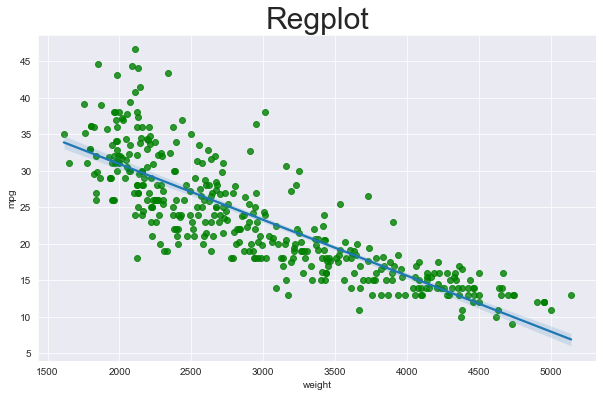

In [44]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})


In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [46]:
y_preds

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907,
       16.26973439, 14.22713816, 25.60622838, 31.37580058, 25.24039025,
       29.77525875, 16.47551834, 12.13119053, 30.34688083, 18.19038459,
       30.23255642, 27.83174368, 21.96309032, 10.62210824, 27.64120299,
       24.7068763 , 17.18432972, 27.8927167 , 21.33049522, 10.15718895,
       29.18839342, 27.71741926, 29.05882575, 18.38092528, 20.36254849,
       31.20812477, 17.58065437,  7.88594388, 31.20812477, 14.8978414 ,
       26.15498558, 14.41005723, 23.525524  , 29.42466388, 24.63066003,
       29.00547435, 21.9021173 , 30.33925921, 30.8041785 , 26.04066116,
       29.52374504, 14.31097606, 30.70509734, 15.9420044 , 28.17471693,
       26.80282393, 19.86714269, 28.06039251, 24.4020112 , 29.88958317,
       27.45066229, 20.41589989, 21.63536032, 21.50579265, 23.0834696 ,
       15.16459837, 31.07093547, 30.95661105, 20.32444035,  8.20605224,
       24.82882235, 25.62147163, 14.03659747, 26.11687744, 27.42

In [47]:
X_test

,weight
240,2190
390,2665
391,2370
236,2755
222,4060
...,...
190,4215
152,3264
125,3102
105,4654


In [48]:
# weight의 값과 mpg의 값의 차이가 많이나서 차이가 있다.
print('f 기울기:{lr.coef_}')

f 기울기:{lr.coef_}


In [49]:
# 절편
print(f' 절편:{lr.intercept_}')

 절편:45.971217704757684


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)  # sqrt 스퀘어 루트(루트를 씀)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse:{rmse},r_square:{r_square,4}')

mse: 22.168955157340807,rmse:4.70839199274453,r_square:(0.6410608728212728, 4)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

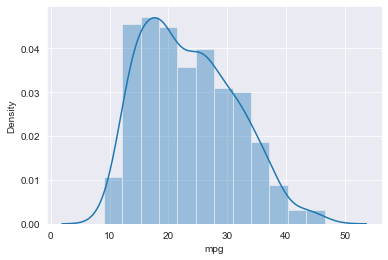

In [51]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

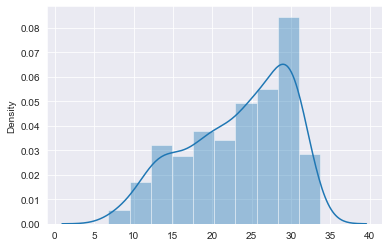

In [52]:
#kde는 밀도함수
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

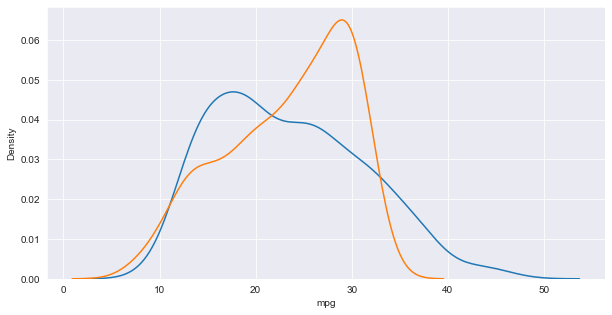

In [53]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False,label='y')
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')
plt.show()
plt.close()

## 다항 회귀분석
 - 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡성 형태의 회귀선을 표현할 수 있음
 - 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
 - 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [54]:
X_train.shape

(274, 1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures  #다항식 변환

In [56]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [57]:
X_train_poly[:5]

array([[1.0000000e+00, 2.1200000e+03, 4.4944000e+06],
       [1.0000000e+00, 4.4990000e+03, 2.0241001e+07],
       [1.0000000e+00, 1.8450000e+03, 3.4040250e+06],
       [1.0000000e+00, 2.0450000e+03, 4.1820250e+06],
       [1.0000000e+00, 1.9850000e+03, 3.9402250e+06]])

In [58]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [59]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.6368479947378759

In [60]:
print(pr.coef_)
print(pr.intercept_)

[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]
65.122741427334


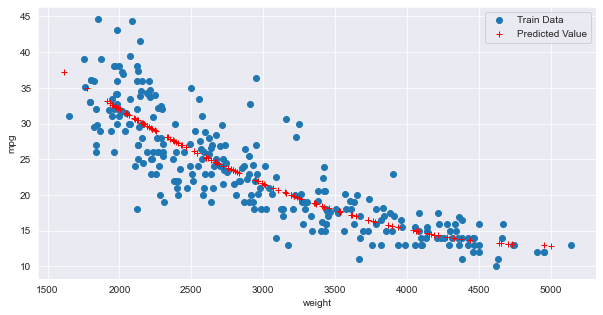

In [61]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+',label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [62]:
# 0~1사이의 균일분포
import numpy as np
np.random.rand(100,1)

array([[0.51946924],
       [0.99735066],
       [0.03546216],
       [0.99948268],
       [0.08404195],
       [0.28779338],
       [0.31613506],
       [0.57532043],
       [0.85079912],
       [0.32364469],
       [0.42940754],
       [0.81733603],
       [0.7546012 ],
       [0.96470415],
       [0.10303909],
       [0.24701725],
       [0.27620901],
       [0.49715439],
       [0.2637464 ],
       [0.97251021],
       [0.07712871],
       [0.93922586],
       [0.18947957],
       [0.26950824],
       [0.60163171],
       [0.25632289],
       [0.93788371],
       [0.74816574],
       [0.10159694],
       [0.30455156],
       [0.61176732],
       [0.95156011],
       [0.17181092],
       [0.69190234],
       [0.08724535],
       [0.08511276],
       [0.35427597],
       [0.9034675 ],
       [0.4283227 ],
       [0.26084506],
       [0.64062249],
       [0.54913217],
       [0.92809912],
       [0.13409737],
       [0.9612234 ],
       [0.49041578],
       [0.77938309],
       [0.558

In [63]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m=100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 +np.random.randn(m,1)

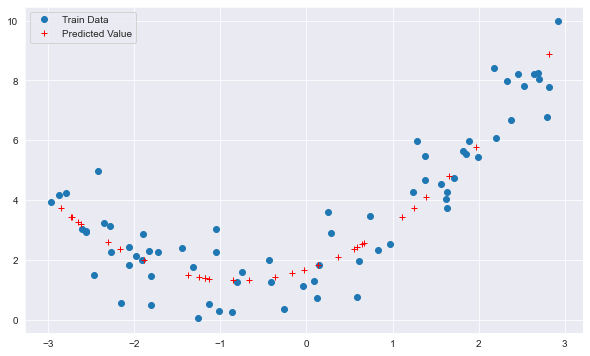

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)
# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)
# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()


In [65]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

## 다중 회귀분석
 - 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
 - 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 겂들을 찾아서 모형을 완성

In [66]:
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [67]:
X = df.drop('mpg',axis=1)
y = df['mpg']
#독립변수가 여러개 (mpg만 놔둠)
X.shape


(392, 3)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [69]:
# Q. mse, rmse, r_square(r2_score), 기울기, 절편

In [70]:
# 

In [71]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)  # sqrt 스퀘어 루트(루트를 씀)
r_square = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse:{rmse},r_square:{r_square,4}')

mse: 17.33008562898996,rmse:4.162941943985042,r_square:(0.6939048496695597, 4)


In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [73]:
X_test

,cylinders,horsepower,weight
243,3,110.0,2720
371,4,84.0,2525
300,8,90.0,3420
345,4,60.0,1760
265,8,140.0,4080
...,...,...,...
384,4,67.0,1965
20,4,87.0,2672
189,8,120.0,3962
60,4,90.0,2408


<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

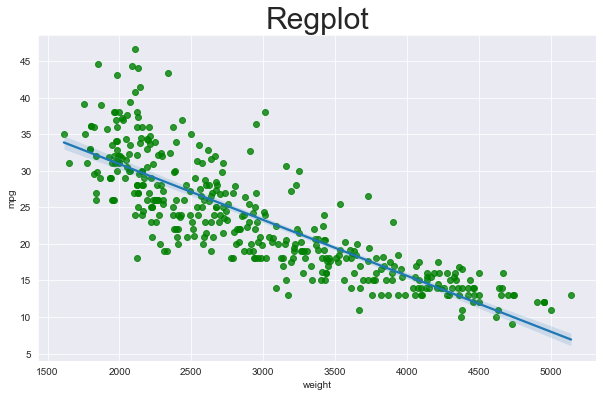

In [74]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='weight',y='mpg',data=ndf,scatter_kws={'color':'green'})

<AxesSubplot:title={'center':'Regplot'}, xlabel='cylinders', ylabel='mpg'>

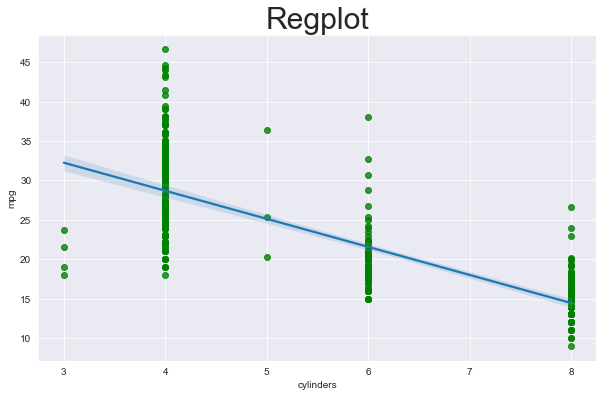

In [75]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='cylinders',y='mpg',data=ndf,scatter_kws={'color':'green'})

<AxesSubplot:title={'center':'Regplot'}, xlabel='horsepower', ylabel='mpg'>

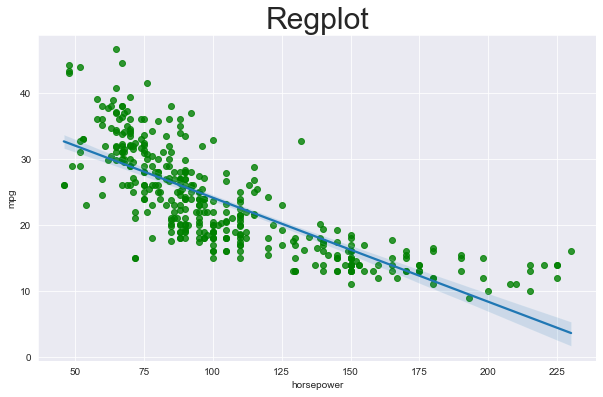

In [76]:
sns.set_style('darkgrid')
fig,axes = plt.subplots(1,1,figsize=(10,6))
plt.title('Regplot',fontsize=30)
sns.regplot(x='horsepower',y='mpg',data=ndf,scatter_kws={'color':'green'})

In [77]:
print('f 기울기:{lr.coef_}')

f 기울기:{lr.coef_}


In [78]:
print(f' 절편:{lr.intercept_}')

 절편:46.41435126963407


In [79]:
#[과제] y_test,y_hat을 하나의 그래프로 비교하여 시각화하세요

<AxesSubplot:xlabel='mpg', ylabel='Density'>

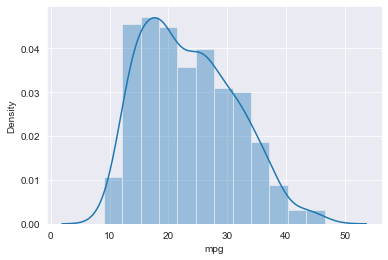

In [80]:
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

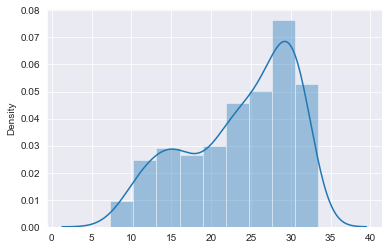

In [81]:
y_hat = lr.predict(X)
sns.distplot(y_hat,kde=True)

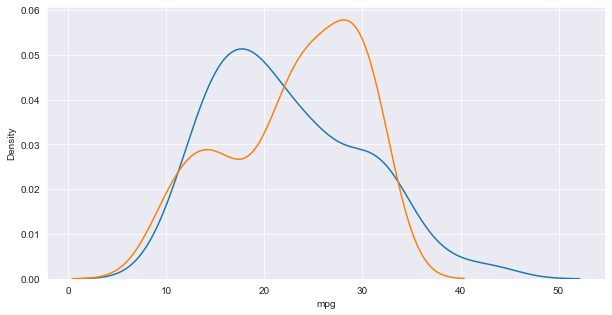

In [82]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y_test,hist=False,label='y_test')
ax2 = sns.distplot(y_preds,hist=False,label='y_preds')
plt.show()
plt.close()

[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요

In [83]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
import matplotlib.pyplot as plt

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

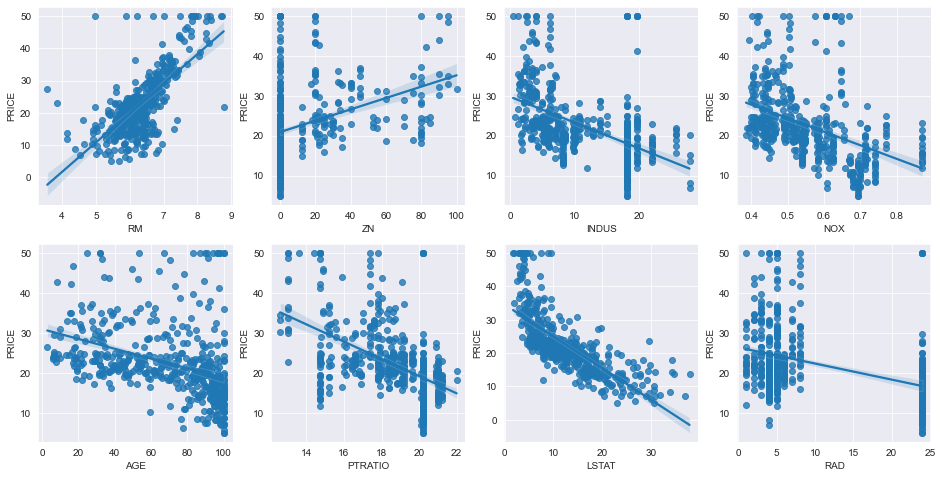

In [86]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features= ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(data = boston_df, x=feature, y='PRICE', ax=axs[row][col])

In [87]:
y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'],axis=1, inplace=False)
X_train, X_test,y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)
# r_square : 설명력
print(f'mse: {mse},rmse:{rmse}')
print('Variance_score:{0:.3f}'.format(r2_score(y_test,y_preds)))

mse: 17.296915907902047,rmse:4.158956107955703
Variance_score:0.757


 - MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
 - MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
 - RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
 - R square : 분산 기반으로 예측 성능을 평가, 실제값의 분산 대비 예측값의 분산 비율을 지표로 함

In [88]:
print('절편값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))
# 회기계수를 구하기 위해서 계수값과 절편을 구한다

절편값: 40.99559517216444
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [89]:
import numpy as np
import pandas as pd

In [90]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [91]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,x_data,y_target,scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))
print(' 5 folds 의 R2_square :')

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
 5 folds 의 R2_square :


In [92]:
# 가격은 종속변수 나머지는 독립변수 (다항회귀식)

<AxesSubplot:>

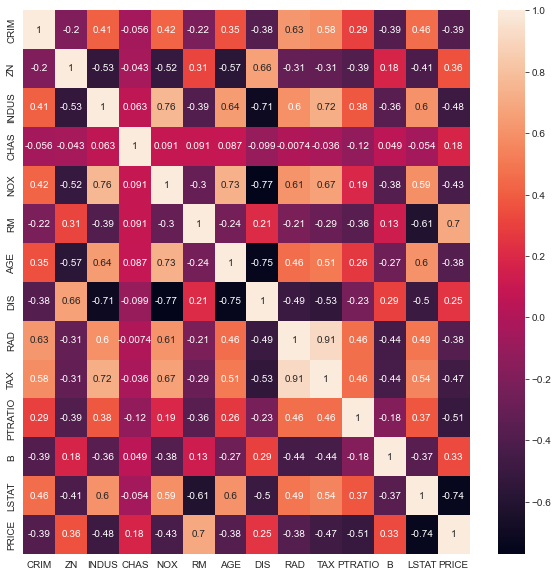

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

hc = boston_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hc,annot=True)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

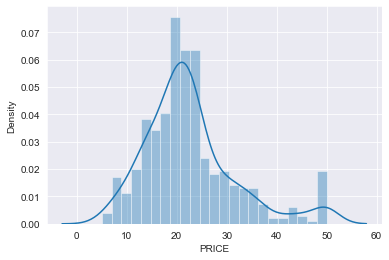

In [94]:
sns.distplot(boston_df.PRICE)

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

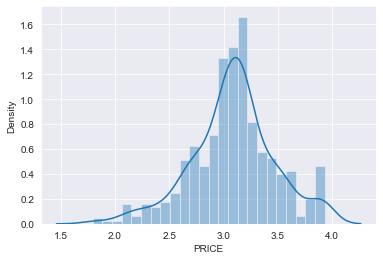

In [95]:
y_log = np.log1p(boston_df['PRICE'])
sns.distplot(y_log)

In [96]:
# 변수 선택 및 로그 변환후 모델링 평가
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score 


X = boston_df[['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']]
y = boston_df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'MSE:{mse:.3f},RMSE:{rmse:.3f},R2:{r2:.3f}')

MSE:25.934,RMSE:5.093,R2:0.717


In [97]:
print(f'절편값:{lr.intercept_:.3f}') # 뒤에 _가 붙는것은 섞이지 않기 위해서 사용한다. 
print(f'회귀 계수값:{np.round(lr.coef_,1)}')

절편값:36.903
회귀 계수값:[  3.2  -0.    0.1 -14.7   0.   -1.2  -0.6   0.1]


#### 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이)를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함(최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀


다중공선성과 관련 있는 지수는 분산팽창계수(variance inflation Factor)
vif가 10보다 클 경우에 유의 하다고 나옴

In [99]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge, X, y , scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(f'rmse scores:{np.round(rmse_scores,3)},')
print(f'avg scores:{avg_rmse:.3f}')


rmse scores:[3.53  5.104 5.751 8.987 5.772],
avg scores:5.829


In [107]:
alphas=[0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print(f'alpha가 {alpha} 일때 5 folds 의 평균 RMSE : {avg_rmse:.3f}')

alpha가 0 일때 5 folds 의 평균 RMSE : 6.051
alpha가 0.1 일때 5 folds 의 평균 RMSE : 6.044
alpha가 1 일때 5 folds 의 평균 RMSE : 6.013
alpha가 10 일때 5 folds 의 평균 RMSE : 5.948
alpha가 100 일때 5 folds 의 평균 RMSE : 5.811


In [109]:
alphas = [0 , 0.1 , 1 , 10 , 100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.round(np.sqrt(-1 * neg_mse_scores), 2)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha: {alpha}\nRMSE: {rmse_scores}\n평균 RMSE: {avg_rmse:.3f}\n')


alpha: 0
RMSE: [3.4  5.23 6.23 9.47 5.94]
평균 RMSE: 6.051

alpha: 0.1
RMSE: [3.38 5.23 6.22 9.46 5.93]
평균 RMSE: 6.044

alpha: 1
RMSE: [3.28 5.27 6.18 9.42 5.92]
평균 RMSE: 6.013

alpha: 10
RMSE: [3.22 5.4  6.23 9.09 5.8 ]
평균 RMSE: 5.948

alpha: 100
RMSE: [3.52 5.75 6.75 7.8  5.24]
평균 RMSE: 5.811



In [ ]:
# Q.  상기의 경우 alpha값이 증가하면 회귀계수가 지속적으로 작아지는 것을 시각화하여 설명하세요.

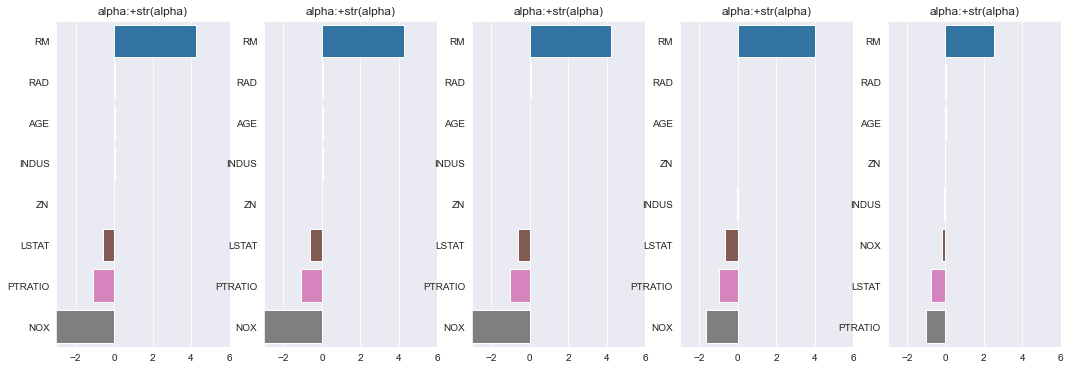

In [110]:
fig,axs = plt.subplots(figsize=(18,6),nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha= alpha)
    ridge.fit(X, y)
    coeff = pd.Series(data=ridge.coef_,index=X.columns)
    colname='alpha:+str(alpha)'
    coeff_df[colname] = coeff
    
    coeff =coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

[과제] 모델이름과 alpha리스트를 대입하면 alpha값별로 rmse를 구해주는 사용자 함수를 작성하여 아래를 수행하세요.
  - lasso, [0.07, 0.1, 0.5, 1.3]
  - elasticnet, [0.07, 0.1, 0.5, 1.3]

In [114]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X=None, y=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print(model_name)
    for param in params:
        if model_name == 'Ridge': model=Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha가 {alpha} 일때 5 folds 의 평균 RMSE : {avg_rmse:.3f}')
        
        model.fit(X,y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X.columns)
        colname ='alpha:'+str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

            
        

In [115]:
# Lasso에 사용될 alpha파라미터의 값을 정의하고 함수 호출
lasso_alphas=[0.07, 0.1, 0.5, 1.3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas, X = X, y = y)

Lasso
alpha가 100 일때 5 folds 의 평균 RMSE : 5.998
alpha가 100 일때 5 folds 의 평균 RMSE : 5.999
alpha가 100 일때 5 folds 의 평균 RMSE : 6.054
alpha가 100 일때 5 folds 의 평균 RMSE : 6.062


In [117]:
elastic_alphas= [0.07, 0.1, 0.5, 1.3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas, X=X, y=y)

ElasticNet
alpha가 100 일때 5 folds 의 평균 RMSE : 5.955
alpha가 100 일때 5 folds 의 평균 RMSE : 5.940
alpha가 100 일때 5 folds 의 평균 RMSE : 5.896
alpha가 100 일때 5 folds 의 평균 RMSE : 5.971
